# Creating Vulcanized rubber with SwiftPol.crosslink

This code uses SwiftPol's framework to build a chain of Vulcanized rubber


In [21]:
# Imports
from rdkit import Chem
from rdkit.Chem import AllChem
import random
# Import SwiftPol
from swiftpol import build, crosslink

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')

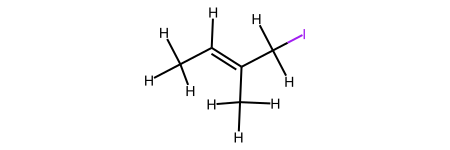

In [9]:
# Define Monomer
isoprene = 'CC=C(-C)CI' # Added an iondine to block the methyl side chain in isoprene from undergoing addition
isoprene_rdmol = Chem.MolFromSmiles(isoprene)
isoprene_rdmol = Chem.AddHs(isoprene_rdmol)
# Add Monomer info, because this wasn't built with SwiftPol
info = Chem.AtomPDBResidueInfo()
info.SetResidueName('1ISO1')
info.SetResidueNumber(1)
info.SetChainId('A')
[atom.SetMonomerInfo(info) for atom in isoprene_rdmol.GetAtoms()]
isoprene_rdmol

In [7]:
## The reactions for activation and reaction
reaction_templates = {'linear_activate' : ['[C:1](-[H:5])(-[H:6])(-[H:7])-[C:2]=[C:3].[Cl:4]>>[C:1](-[Cl:4])(-[H:6])(-[H:7])-[C:2]=[C:3].[H:5]', 'Cl'],
                      'linear_react' : ['[C:1][Cl:2].[C:3][Cl:4]>>[C:1][C:3].[Cl:2].[Cl:4]'],
                      'branched_activate' : ['[C:1](-[H:2])=[C:3]-[C:4].[S:5]>>[C:1](-[S:5])=[C:3]-[C:4].[H:2]', 'S-S-S'],
                      'branched_react' : ['[C:1]-[S:2]-[S:3]-[S:4].[H:5]-[C:6]>>[C:1]-[S:2]-[S:3]-[S:4]-[C:6].[H:5]']}

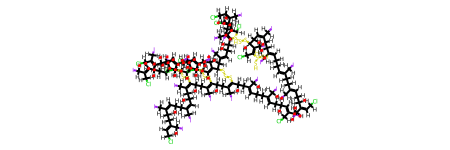

In [27]:
# Build up a larger branched system to a target molecular weight
branched_mw = crosslink.build_branched_polymer(starting_polymer = isoprene_rdmol,
                                               reaction_templates = reaction_templates,
                                               num_iterations=25,
                                               probability_of_branched_addition=0.2, 
                                               probability_of_linear_addition=0.8)
branched_mw

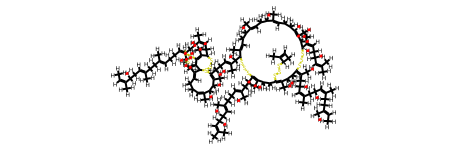

In [28]:
crosslinked_network = crosslink.crosslink_polymer(branched_mw, percentage_to_crosslink=80)
crosslinked_network